In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"C:\Users\Asus\Downloads\PGA32\Project\Linear Regression\advertising_sales_data.csv")
data

,TV,Radio,Newspaper,Sales
0,112.362036,18.513293,26.170568,22.402456
1,285.214292,54.190095,24.697880,38.839188
2,219.598183,87.294584,90.625458,59.464533
3,179.597545,73.222489,24.954620,36.409661
4,46.805592,80.656115,27.194973,38.931941
...,...,...,...,...
995,27.474622,65.695516,86.529576,46.370492
996,275.194073,95.661462,15.727321,47.282896
997,41.045589,6.895802,30.978786,18.087485
998,285.071206,5.705472,29.004553,25.273263


In [3]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,112.362036,18.513293,26.170568,22.402456
1,285.214292,54.190095,24.697880,38.839188
2,219.598183,87.294584,90.625458,59.464533
3,179.597545,73.222489,24.954620,36.409661
4,46.805592,80.656115,27.194973,38.931941
5,46.798356,65.878337,75.939826,42.345902
6,17.425084,69.227656,44.973984,34.721543
7,259.852844,84.919565,77.671056,56.690971
8,180.334504,24.966801,6.536616,17.458273
9,212.421773,48.942496,48.757119,38.748349


In [4]:
data.tail()

,TV,Radio,Newspaper,Sales
995,27.474622,65.695516,86.529576,46.370492
996,275.194073,95.661462,15.727321,47.282896
997,41.045589,6.895802,30.978786,18.087485
998,285.071206,5.705472,29.004553,25.273263
999,133.801732,28.218707,87.141403,35.971971


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,147.076966,50.701731,50.240573,36.146286
std,87.641209,29.218989,29.067420,11.451507
min,1.389607,0.321826,0.001163,5.201850
25%,70.791980,24.107427,26.135098,27.565100
50%,149.042213,51.873391,50.061392,35.704112
75%,223.295876,76.046506,75.910353,44.347817
max,299.915302,99.941373,99.782086,62.967364


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         1000 non-null   float64
 1   Radio      1000 non-null   float64
 2   Newspaper  1000 non-null   float64
 3   Sales      1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [7]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [8]:
data.isna().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

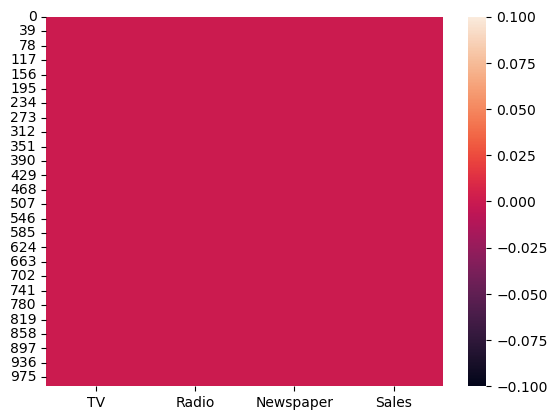

In [10]:
# Heat map to visualize the null values
sns.heatmap(data.isnull());

In [11]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

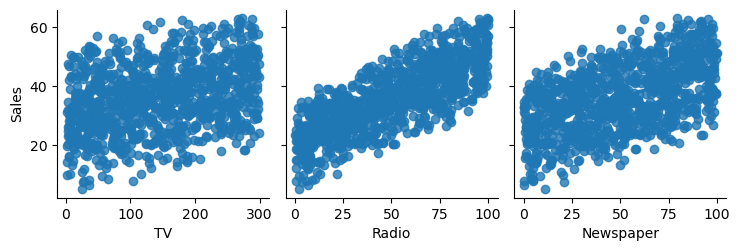

In [92]:
sns.pairplot(data=data, x_vars=['TV', 'Radio', 'Newspaper'], 
             y_vars=['Sales'],
             kind='reg');

In [12]:
# Assign variable x & y
x = data[['TV','Radio','Newspaper']]
y = data['Sales']

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [14]:
# Split the data into training and testing sets                        
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state = 42)

In [15]:
x_train

,TV,Radio,Newspaper
29,13.935124,82.891547,65.417460
535,283.429719,12.188609,83.414460
695,183.186013,6.817231,51.903228
557,8.634803,41.102847,29.956568
836,274.453770,12.809575,99.325502
...,...,...,...
106,123.114877,39.624202,85.717926
270,242.808347,69.498189,10.422480
860,232.658285,77.644745,86.677035
435,210.290739,2.997359,38.948189


In [16]:
y_train

29     44.028922
535    35.677203
695    20.653373
557    21.407421
836    37.292546
         ...    
106    37.795334
270    39.055300
860    57.302149
435    21.396633
102    38.310588
Name: Sales, Length: 800, dtype: float64

In [17]:
x_test

,TV,Radio,Newspaper
521,114.267257,93.443603,13.443513
737,244.979832,19.462251,54.448233
740,138.803936,82.753790,36.568075
660,106.829018,60.059433,47.228180
411,285.018590,11.191962,14.055297
...,...,...,...
408,271.614593,58.535436,98.803597
332,4.318047,22.845474,60.379545
208,1.518475,27.362667,29.221823
613,24.527710,32.433375,74.090406


In [18]:
y_test

521    41.209247
737    33.965457
740    39.055951
660    36.549354
411    20.960760
         ...    
408    50.924703
332    23.443378
208    19.769546
613    28.416087
78     37.797705
Name: Sales, Length: 200, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression 

In [20]:
LR = LinearRegression()

In [21]:
LR

LinearRegression()

In [22]:
LR.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = LR.predict(x_test)

In [24]:
# Here we import libraries to calculate MAE, MSE & R_Squared
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
r2 = r2_score(y_test, y_pred)

print(f"R_squared (R2) score: {r2}")

R_squared (R2) score: 0.9690873726392172


In [26]:
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 4.440725311427183


In [27]:
mae = mean_absolute_error(y_test,y_pred)

print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 1.7559585789184038


In [28]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

2.107302852327397

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Predict Sales revenue of advertisment budget for TV = $200, Radio = $150 & Newspaper = $50
LR_pred=LR.predict([[200, 150, 50]])

print("Sales revenue","","$", LR_pred)

Sales revenue  $ [67.46836223]


In [31]:
# here we import necessary liabraires to tunning the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

In [32]:
# Create a linear regression model
lr_model = LinearRegression()

# Perform cross-validation (to evaluate model performance, not modify the model)
cv_scores = cross_val_score(lr_model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


Cross-validation scores:  [0.97062939 0.96920118 0.96621057 0.9692454  0.96719311]
Mean cross-validation score:  0.9684959285615804


In [33]:
# Create a ridge regression model
ridge_model = Ridge(alpha=1.0)

# Perform cross-validation
ridge_scores = cross_val_score(ridge_model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

Cross-validation scores:  [0.97062939 0.96920118 0.96621057 0.9692454  0.96719311]
Mean cross-validation score:  0.9684959285615804


In [34]:
# Create a lasso regression model
lasso_model = Lasso(alpha=1.0)

# Perform cross-validation
lasso_scores = cross_val_score(lasso_model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

Cross-validation scores:  [0.97062939 0.96920118 0.96621057 0.9692454  0.96719311]
Mean cross-validation score:  0.9684959285615804


In [36]:
# Fit the linear regression model on the training data
lr_model.fit(x_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(x_test)

# Calculate mean squared error
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mse

# Calculate R_squared
lr_r2 = r2_score(y_test,lr_predictions)
lr_r2
lr_r2*100

96.90873726392172

In [37]:
# Fit the ridge model on the training data
ridge_model.fit(x_train, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(x_test)

# Calculate R_squared
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_r2*100

96.9087264260852

In [38]:
# Fit the lasso model on the training data
lasso_model.fit(x_train, y_train)

# Make predictions
lasso_predictions = lasso_model.predict(x_test)

# Calculate R_squared
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_r2*100

96.8747518580558

In [39]:
accuracy = LR.score(x_train, y_train)
accuracy

0.9690694359516957

In [40]:
accuracy_2 = LR.score(x_test, y_test)
accuracy_2

0.9690873726392172

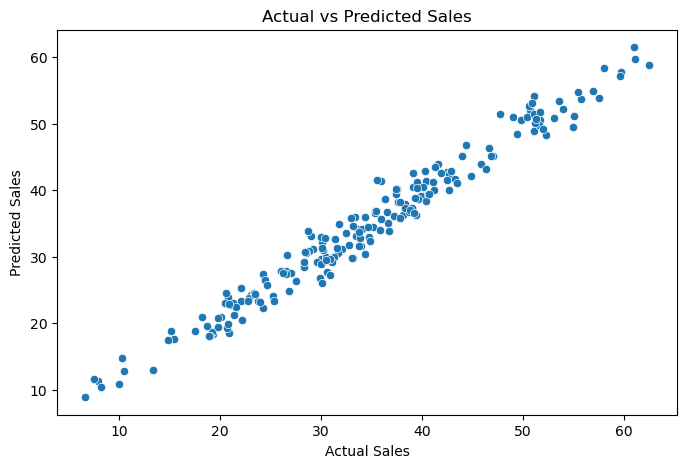

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


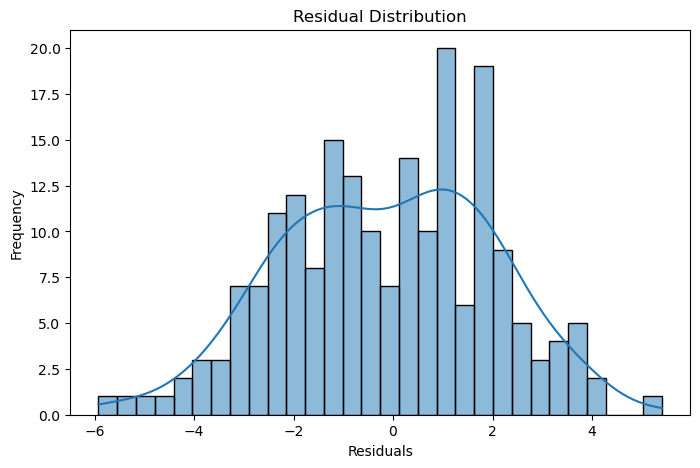

In [42]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()